# EYE FOR BLIND


In [3]:
!pip install gTTs
!pip install wordcloud
!pip install pydot
!pip install graphviz

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob

from skimage import io
# Set the max column width to see the complete caption
pd.set_option('display.max_colwidth',-1) 


import collections
from wordcloud import STOPWORDS


import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Model
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tqdm import tqdm
from PIL import Image

import gtts
from gtts import gTTS
from IPython import display

from collections import Counter

  Using cached gTTS-2.2.3-py3-none-any.whl (25 kB)
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
  Using cached wordcloud-1.8.1-cp36-cp36m-manylinux1_x86_64.whl (366 kB)
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
  Using cached graphviz-0.19.1-py3-none-any.whl (46 kB)
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


In [4]:
!pip install kaggle
# !pip install google-colab

Processing ./.cache/pip/wheels/77/47/e4/44a4ba1b7dfd53faaa35f59f1175e123b213ff401a8a56876b/kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-5.0.2-py2.py3-none-any.whl (6.7 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [5]:
# If already downloaded in drive, else download from kaggle to drive first
# from google.colab import drive
# drive.mount('/content/drive')
# %cd drive/MyDrive/'Colab Notebooks'
# %ls
# ##!wget --no-check-certificate "https://docs.google.com/uc?export=download&id=14G_I54AY7gZz4E-bvxh-AdxrfQVQanrQ" -O "captions.txt"
# ##!wget --no-check-certificate "https://docs.google.com/uc?export=download&id=1-21KLmnsh9NFTc5M5nh-eno41lK9CI62" 

In [6]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

In [7]:
# !kaggle datasets download -d adityajn105/flickr8k

In [8]:
# !unzip flickr8k.zip

In [9]:
#Import the dataset and read the image into a seperate variable

images='Images'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


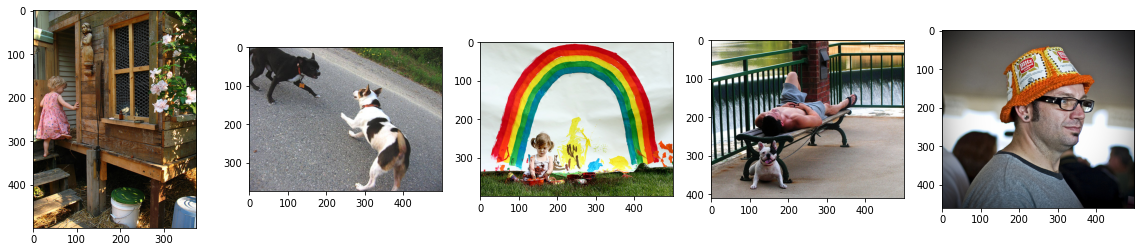

In [10]:
#Visualise both the images & text present in the dataset
sample_Images= all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
   
for ax,image in zip(axes, sample_Images):
    ax.imshow(io.imread(image), cmap=None)


In [11]:
#Import the dataset and read the text file into a seperate variable

text_file = 'captions.txt'

def load_doc(text_file):
    open_file = open(text_file, 'r', encoding="latin-1") 
    text = open_file.read() 
    print(text)
    open_file.close()    
    return text

doc = load_doc(text_file)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


In [13]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.5)
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


Creating a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [14]:
all_img_id= []
all_img_vector= []
annotations= []

image_path = images + "/"

with open('captions.txt', 'r') as fo:
    next(fo) #skip the heading 
    for line in fo:
        split_arr=line.split(',')
        all_img_id.append(split_arr[0])
        annotations.append(split_arr[1].rstrip('\n.').lower()) #striping \n and fullstop
        all_img_vector.append(image_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

ID                              Path  \
0      1000268201_693b08cb0e.jpg  Images/1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg  Images/1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg  Images/1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg  Images/1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg  Images/1000268201_693b08cb0e.jpg   
...                          ...                               ...   
40450  997722733_0cb5439472.jpg   Images/997722733_0cb5439472.jpg    
40451  997722733_0cb5439472.jpg   Images/997722733_0cb5439472.jpg    
40452  997722733_0cb5439472.jpg   Images/997722733_0cb5439472.jpg    
40453  997722733_0cb5439472.jpg   Images/997722733_0cb5439472.jpg    
40454  997722733_0cb5439472.jpg   Images/997722733_0cb5439472.jpg    

                                                                         Captions  
0      a child in a pink dress is climbing up a set of stairs in an entry way      
1      a girl going into a wooden building                                         
2      a little girl climbing into a wooden playhouse                              
3      a little girl climbing the stairs to her playhouse                          
4      a little girl in a pink dress going into a wooden cabin                     
...                                                         ...                    
40450  a man in a pink shirt climbs a rock face                                    
40451  a man is rock climbing high in the air                                      
40452  a person in a red shirt climbing up a rock face covered in assist handles   
40453  a rock climber in a red shirt                                               
40454  a rock climber practices on a rock climbing wall                            

[40455 rows x 3 columns]

In [15]:
## lower case
## adding the <start> & <end> token to all those captions as well
annotations=['<start>' + ' ' +  line.lower() + ' ' + '<end>' for line in annotations]

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_vector)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


In [16]:
#Creating the vocabulary & the counter for the captions

vocabulary = [word for line in annotations for word in line.split()]

val_count = Counter(vocabulary)

print(val_count.most_common()[0:50])
print(val_count.most_common()[:-50:-1])
print(len(vocabulary))

[('a', 60196), ('<start>', 40455), ('<end>', 40455), ('in', 18174), ('the', 17507), ('on', 10357), ('is', 9069), ('and', 8057), ('dog', 7948), ('with', 7304), ('man', 7137), ('of', 6495), ('two', 5132), ('white', 3706), ('black', 3620), ('boy', 3514), ('are', 3365), ('woman', 3304), ('girl', 3277), ('to', 3005), ('wearing', 2916), ('people', 2811), ('at', 2810), ('water', 2676), ('young', 2587), ('red', 2553), ('brown', 2457), ('an', 2325), ('his', 2255), ('blue', 2125), ('dogs', 2095), ('running', 1996), ('through', 1978), ('playing', 1954), ('while', 1807), ('down', 1755), ('little', 1736), ('shirt', 1735), ('standing', 1702), ('ball', 1678), ('grass', 1565), ('person', 1515), ('child', 1507), ('snow', 1439), ('jumping', 1430), ('over', 1378), ('front', 1322), ('sitting', 1322), ('small', 1257), ('three', 1251)]
[('patterns', 1), ('scrolled', 1), ('majestically', 1), ('weight', 1), ('spaniels', 1), ('cocker', 1), ('breezeway', 1), ('rainstorm', 1), ('containig', 1), ('swatting', 1), 

a :  60196
<start> :  40455
<end> :  40455
in :  18174
the :  17507
on :  10357
is :  9069
and :  8057
dog :  7948
with :  7304
man :  7137
of :  6495
two :  5132
white :  3706
black :  3620
boy :  3514
are :  3365
woman :  3304
girl :  3277
to :  3005
wearing :  2916
people :  2811
at :  2810
water :  2676
young :  2587
red :  2553
brown :  2457
an :  2325
his :  2255
blue :  2125


Text(0, 0.5, 'Counts')

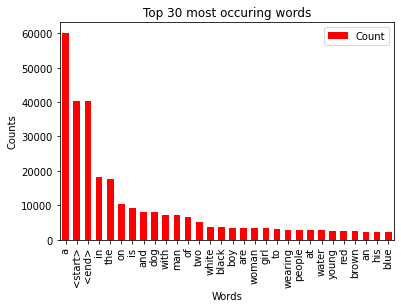

In [17]:
#Visualising the top 30 occuring words in the captions


for word, count in val_count.most_common(30):
    print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word',y='Count',width=0.6,color='red')
plt.title("Top 30 most occuring words")
plt.xlabel("Words")
plt.ylabel("Counts")

<start> :  40455
<end> :  40455
dog :  7948
man :  7137
two :  5132
white :  3706
black :  3620
boy :  3514
woman :  3304
girl :  3277
wearing :  2916
people :  2811
water :  2676
young :  2587
red :  2553
brown :  2457
blue :  2125
dogs :  2095
running :  1996
playing :  1954
little :  1736
shirt :  1735
standing :  1702
ball :  1678
grass :  1565
person :  1515
child :  1507
snow :  1439
jumping :  1430
front :  1322


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '<start>'),
  Text(1, 0, '<end>'),
  Text(2, 0, 'dog'),
  Text(3, 0, 'man'),
  Text(4, 0, 'two'),
  Text(5, 0, 'white'),
  Text(6, 0, 'black'),
  Text(7, 0, 'boy'),
  Text(8, 0, 'woman'),
  Text(9, 0, 'girl'),
  Text(10, 0, 'wearing'),
  Text(11, 0, 'people'),
  Text(12, 0, 'water'),
  Text(13, 0, 'young'),
  Text(14, 0, 'red'),
  Text(15, 0, 'brown'),
  Text(16, 0, 'blue'),
  Text(17, 0, 'dogs'),
  Text(18, 0, 'running'),
  Text(19, 0, 'playing'),
  Text(20, 0, 'little'),
  Text(21, 0, 'shirt'),
  Text(22, 0, 'standing'),
  Text(23, 0, 'ball'),
  Text(24, 0, 'grass'),
  Text(25, 0, 'person'),
  Text(26, 0, 'child'),
  Text(27, 0, 'snow'),
  Text(28, 0, 'jumping'),
  Text(29, 0, 'front')])

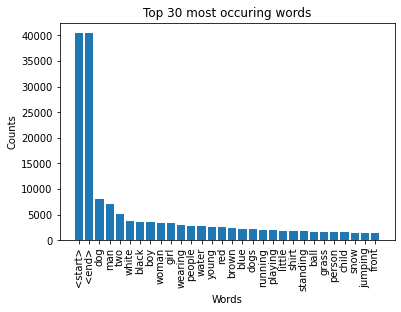

In [18]:
## Visualising after removing stopwords
for word, count in val_count.most_common(47):
    if word not in STOPWORDS:
        print(word, ": ", count)

dict_without_stopwords = {}
for word, count in val_count.most_common(47):
    if word not in STOPWORDS:
        dict_without_stopwords[word] = count


plt.bar(range(len(dict_without_stopwords)), dict_without_stopwords.values(), align='center')
plt.xticks(range(len(dict_without_stopwords)), list(dict_without_stopwords.keys()))
plt.title("Top 30 most occuring words")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation=90)

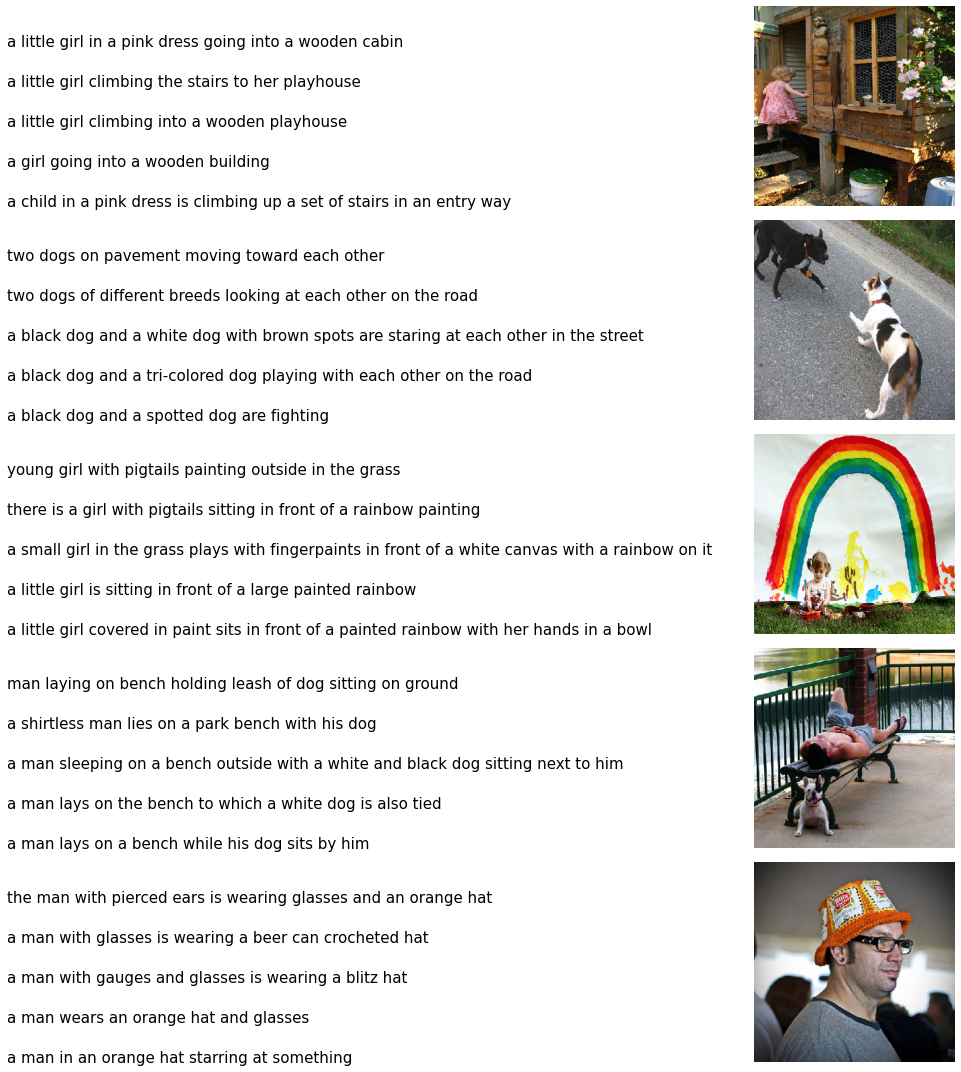

In [19]:
fig = plt.figure(figsize=(15,15)) 
count = 1
    
for Path in df[:25].Path.unique(): # Loading 1st 25 paths which will have 5 distinct images
    captions = list(df["Captions"].loc[df.Path== Path].values)
    display_image = load_img(Path,target_size=(299,299,3))
    ax = fig.add_subplot(5,2,count) #Adding a subplot that spans 5 rows:
    plt.axis('off')  # we don't want both x and y axes for caption 
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions)) #to decide the spacing between each line of caption
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=15)  
    count+=1
    plt.tight_layout() #to make sure that image and caption don't overlap

    ax = fig.add_subplot(5,2,count)
    ax.imshow(display_image)
    plt.axis('off')
    count +=1

plt.show()

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [20]:
# create the tokenizer

top_voc = 5000
tokenizer =Tokenizer(num_words=top_voc+1,filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ',
                                                  lower=True, char_level=False,
                                                  oov_token="UNK") ######


# Create word-to-index and index-to-word mappings.

tokenizer.fit_on_texts(annotations) 
train_seqs = tokenizer.texts_to_sequences(annotations)

# using 0 as the padding value.
# In order to distinguish between PAD and UNKNOWN, keras use different index for UNKNOWN
# 0 is a reserved index that won't be assigned to any word. Let's add PAD token for zero

tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [21]:
print(tokenizer.oov_token)
print(tokenizer.index_word[0])

UNK
PAD


In [22]:
tokenizer.index_word

{1: 'UNK',
 2: 'a',
 3: '<start>',
 4: '<end>',
 5: 'in',
 6: 'the',
 7: 'on',
 8: 'is',
 9: 'and',
 10: 'dog',
 11: 'with',
 12: 'man',
 13: 'of',
 14: 'two',
 15: 'white',
 16: 'black',
 17: 'boy',
 18: 'are',
 19: 'woman',
 20: 'girl',
 21: 'to',
 22: 'wearing',
 23: 'people',
 24: 'at',
 25: 'water',
 26: 'young',
 27: 'red',
 28: 'brown',
 29: 'an',
 30: 'his',
 31: 'blue',
 32: 'dogs',
 33: 'running',
 34: 'through',
 35: 'playing',
 36: 'shirt',
 37: 'while',
 38: 'down',
 39: 'little',
 40: 'standing',
 41: 'ball',
 42: 'grass',
 43: 'person',
 44: 'child',
 45: 'snow',
 46: 'jumping',
 47: 'over',
 48: 'three',
 49: 'front',
 50: 'sitting',
 51: 'small',
 52: 'up',
 53: 'field',
 54: 'holding',
 55: 'large',
 56: 'group',
 57: 'by',
 58: 'green',
 59: 'yellow',
 60: 'children',
 61: 'walking',
 62: 'men',
 63: 'her',
 64: 'into',
 65: 'beach',
 66: 'air',
 67: 'near',
 68: 'jumps',
 69: 'mouth',
 70: 'street',
 71: 'runs',
 72: 'for',
 73: 'another',
 74: 'riding',
 75: 'from'

In [23]:
tokenizer.word_counts

OrderedDict([('<start>', 40455),
             ('a', 61436),
             ('child', 1517),
             ('in', 18193),
             ('pink', 706),
             ('dress', 332),
             ('is', 9069),
             ('climbing', 495),
             ('up', 1251),
             ('set', 106),
             ('of', 6504),
             ('stairs', 109),
             ('an', 2358),
             ('entry', 1),
             ('way', 51),
             ('<end>', 40455),
             ('girl', 3284),
             ('going', 145),
             ('into', 1046),
             ('wooden', 278),
             ('building', 485),
             ('little', 1750),
             ('playhouse', 6),
             ('the', 17677),
             ('to', 3008),
             ('her', 1102),
             ('cabin', 4),
             ('black', 3641),
             ('dog', 7958),
             ('and', 8066),
             ('spotted', 37),
             ('are', 3365),
             ('fighting', 131),
             ('tri', 12),
             ('color

In [24]:
annotations[:5]

['<start> a child in a pink dress is climbing up a set of stairs in an entry way  <end>',
 '<start> a girl going into a wooden building  <end>',
 '<start> a little girl climbing into a wooden playhouse  <end>',
 '<start> a little girl climbing the stairs to her playhouse  <end>',
 '<start> a little girl in a pink dress going into a wooden cabin  <end>']

In [25]:
train_seqs[:5]

[[3, 2, 44, 5, 2, 89, 173, 8, 116, 52, 2, 389, 13, 385, 5, 29, 1, 670, 4],
 [3, 2, 20, 313, 64, 2, 197, 120, 4],
 [3, 2, 39, 20, 116, 64, 2, 197, 2368, 4],
 [3, 2, 39, 20, 116, 6, 385, 21, 63, 2368, 4],
 [3, 2, 39, 20, 5, 2, 89, 173, 313, 64, 2, 197, 2887, 4]]

In [26]:
# Pad each vector to the max_length (or 75th percentile) of the captions, store it to a vairable

train_seqs_len=[len(seq) for seq in train_seqs] 
longest_word_length= max(train_seqs_len) 

# Calculates the longest_word_length to pad all sequences to be the same length as the longest one.

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post',maxlen=longest_word_length,
                                                          dtype='int32', value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 35)


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

In [27]:
#checking to know about image format as we will be setting data format as none in tf.keras.applications.inception_v3.preprocess_input

tf.keras.backend.image_data_format() 

'channels_last'

Image data format have default as 'channels_last' which indicates Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].



In [28]:
IMAGE_SHAPE= (299, 299)

In [29]:
def preprocess_images_function(image_path):

    img = tf.io.read_file(image_path,name=None)
    # by default channels=0 which indictaes to use the number of channels in the JPEG-encoded image.
    #Since its RGB images,we can give channels=3 also which will output an RGB image.
    img = tf.image.decode_jpeg(img,channels=0) 
    img = tf.image.resize(img, IMAGE_SHAPE)
    img = tf.keras.applications.inception_v3.preprocess_input(img,data_format=None) #Default value for data format is None
    # It refers to global setting tf.keras.backend.image_data_format()
    return img, image_path

In [30]:
#Let's see how preprocessed image looks by preprocessing first 5 images alone.
preprocessed_img = [preprocess_images_function(img)[0] for img in all_imgs[0:5]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)


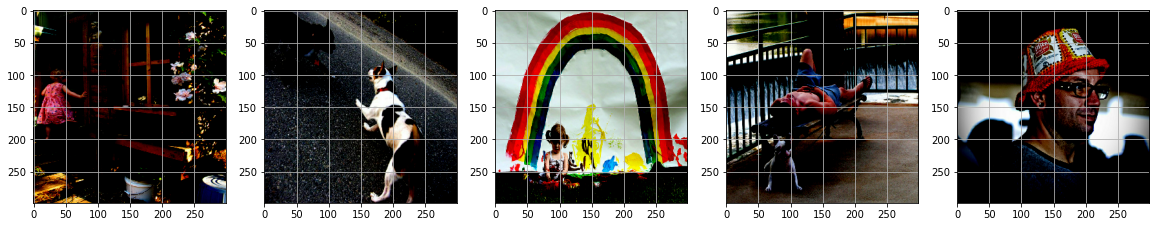

In [31]:
sample_Images= preprocessed_img[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
   
for ax,image in zip(axes, sample_Images):
    print("Shape after resize :", image.shape)
    ax.imshow(image)
    ax.grid('off')

* We have a list which contains all the image path, we need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once we have created a dataset consisting of image paths, we need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [32]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input 
hidden_layer = image_model.layers[-1].output 

#image_features_extract_model = keras.Model(new_input, hidden_layer) 
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)  

In [33]:
image_features_extract_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [34]:
# sorting and storing unique path in list which will be given as input 
training_list = sorted(set(all_img_vector)) 

# Creating a Dataset using tf.data.Dataset.from_tensor_slice
tf_Image_Data = tf.data.Dataset.from_tensor_slices(training_list)

# num_parallel_calls= tf.data.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.
tf_Image_Data = tf_Image_Data.map(preprocess_images_function, num_parallel_calls=tf.data.experimental.AUTOTUNE) ######

tf_Image_Data= tf_Image_Data.batch(64,drop_remainder=False)



In [35]:
tf_Image_Data

<BatchDataset shapes: ((None, 299, 299, None), (None,)), types: (tf.float32, tf.string)>

In [36]:
img_train_data, img_test_data, caption_train_data, caption_test_data = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=42)

In [37]:
print("No of images in training dataset: ",len(img_train_data))
img_train_data[0:5]

No of images in training dataset:  32364


['Images/359082432_c1fd5aa2d6.jpg',
 'Images/2460799229_ce45a1d940.jpg',
 'Images/3634828052_3b6aeda7d6.jpg',
 'Images/2216568822_84c295c3b0.jpg',
 'Images/3080056515_3013830309.jpg']

In [38]:
print("No of images in testing dataset: ",len(img_test_data))
img_test_data[0:5]

No of images in testing dataset:  8091


['Images/2973269132_252bfd0160.jpg',
 'Images/270263570_3160f360d3.jpg',
 'Images/2053006423_6adf69ca67.jpg',
 'Images/512101751_05a6d93e19.jpg',
 'Images/3156406419_38fbd52007.jpg']

In [39]:
print("No of captions in training dataset: ",len(caption_train_data))
caption_train_data[0:5]

No of captions in training dataset:  32364


array([[   3,    2,   12,    9,    2,   10,   18,   40,    7,    2,  144,
         150,  111,  547,   47,   21,    6,  172,    4,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,    6,   48,   96,  240,   18,   22,  472,  548,   18,   91,
          64,    6,   25,    4,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,    2,   19,   11,    2,   94,   11,    2,  287,  188, 2652,
         284,    2,  141,    4,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,   19,   11,   27, 2252,  171,    9, 1889,  432, 1068,    7,
          63,  327,    4,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,   81,   43,   

In [40]:
print("No of captions in testing dataset: ",len(caption_test_data))
caption_test_data[0:5]

No of captions in testing dataset:  8091


array([[   3,    2,   55, 1640,  599,    8, 4535,    2,  225,  123,    2,
        1493,    4,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,   14,   28,   32,  499,    7,    6, 1696,  172,    4,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,    2,   12,    5,  166,    8,   40,    7,    2,   83,   91,
          88,   24,    6,  460,   75,    6, 3978,    4,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,    2,  897,   15,   10,    8,   33,    7,    6,   42,    4,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,    2,   43,  3

In [41]:
# Appling the feature_extraction model to earlier created dataset which contained images & their respective paths
# Then reshaping into (batch_size, 8*8, 2048)

image_features_dict={}
for image, image_path in tqdm(tf_Image_Data): 
    batch_features = image_features_extract_model(image) 
    #fb_shape = batch_features.get_shape().as_list()
    #features_for_batch_flattened = tf.contrib.layers.flatten(fb_shape) 
    batch_features_flattened = tf.reshape(batch_features,
                             (batch_features.shape[0], -1, batch_features.shape[3])) ##We are sqeezing/squashing 
                                   
    for batch_feat, path in zip(batch_features_flattened, image_path):
        feature_path = path.numpy().decode("utf-8")
        image_features_dict[feature_path] =  batch_feat.numpy()


100%|██████████| 127/127 [00:31<00:00,  4.04it/s]


In [42]:
batch_features.shape

TensorShape([27, 8, 8, 2048])

In [43]:
batch_features_flattened.shape

TensorShape([27, 64, 2048])

In [44]:
# image_features_dict

In [45]:
len(image_features_dict)

8091

In [46]:
batch_feat.shape

TensorShape([64, 2048])

In [47]:
# import more_itertools
# top_5_items = more_itertools.take(5, image_features_dict.items())
# top_5_items 

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [48]:
def model_input(image,captions):
    image_final = image_features_dict[image.decode('utf-8')]
    return image_final,captions

In [49]:
# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 1000

# Batch size
BATCH_SIZE = 64 

def data_generator(images_data, captions_data):
    
    # Creating a Dataset using tf.data.Dataset.from_tensor_slice 
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))

    # num_parallel_calls= tf.data.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(model_input, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    # reshuffle_each_iteration=True indicate Shuffle order should be different for each epoch.
    # Keeping batch_size=64 (64 consecutive elements of this dataset is combined in a single batch).
    # Prefetch function is used to prepare later elements while the current element is being processed.
    
    dataset = (
     dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=True) 
    .batch(BATCH_SIZE, drop_remainder=False)
    .prefetch(tf.data.experimental.AUTOTUNE)
    ) 

    return dataset

In [50]:
train_dataset=data_generator(img_train_data,caption_train_data) 
test_dataset=data_generator(img_test_data,caption_test_data)

In [51]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

(64, 64, 2048)
(64, 35)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [52]:
embedding_dim = 256 
units = 512
vocab_size = 5001 #top 5,000 words +1
train_num_steps = len(img_train_data) // BATCH_SIZE  #len(total train images) // BATCH_SIZE
test_num_steps = len(img_test_data) // BATCH_SIZE   #len(total test images) // BATCH_SIZE
max_length=31  ## not taking max_length - 35
features_shape = batch_feat.shape[1]
attention_features_shape = batch_feat.shape[0]

### Encoder

In [53]:
# tf.compat.v1.reset_default_graph() #to resolve compatibility issue
# #from tensorflow.python.framework import ops
# #ops.reset_default_graph()
# #tf.compat.v1.GraphDef()

In [54]:
# print(tf.compat.v1.get_default_graph())


In [55]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build Dense layer with relu activation
        
    def call(self, features):  ### called whenever passed with data, eg:features=encoder(sample_img_batch) 
#         print("Encoder call")
        features = self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0) #applying relu activation 
        return features

In [56]:
encoder=Encoder(embedding_dim)

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(encoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


### Attention model

In [58]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 =  tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units) 
        self.V = tf.keras.layers.Dense(1)
        self.units=units

    def call(self, features, hidden):
#         print("Attention call")
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        # Expand the hidden shape to shape: (batch_size, 1, hidden_size), hidden_size = 512
        hidden_with_time_axis = hidden[:, tf.newaxis]  # insert at second pos, third if [:,:,tf.newaxis]
        
        ## (64,64,512)+(64,1,512)=(64,64,512) ==> 
        ## for image-  (batch, 64, 1) atention tells where to focus on those 64 pixels, condering image 
        ## ? hidden is independent - not for text-  (batch, 1, 1) atention not tells where to focus on those 64 pixels, considering text
        ## hidden as if memory
        # build  score funciton to shape: (batch_size, 8*8, units)
        score =tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis)) 
        
        attention_weights =  tf.keras.activations.softmax(self.V(score), axis=1)# extract attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=2)# reduce the shape to (batch_size, embedding_dim)
        # the tensor is reduced along the second dimension (columns)

        return context_vector, attention_weights

### Decoder

In [59]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise Attention model with units
        ## for img embed_size filters, for text embed_size embedding dim
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim)
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform'
        #  ,dropout=0.3, recurrent_dropout=0.3
        )
        self.d1 = tf.keras.layers.Dense(self.units) 
        self.d2 = tf.keras.layers.Dense(vocab_size) 
        # self.dropout = tf.keras.layers.Dropout(0.3)
        # self.batchNorm = tf.keras.layers.BatchNormalization()  

    def call(self,x,features, hidden):
#         print("Decoder call")
        context_vector, attention_weights = self.attention(features, hidden)#create context vector & attention weights from attention model
        embed = self.embed(x)# embed input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)# Concatenate input with the context vector from attention layer. 
        #Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. 
        ## ( 64,1,512 ),    ( 64,512 )
        #Output shape : (batch_size, max_length, hidden_size)
#         print("output",output.shape,"state",state.shape)
        output = self.d1(output) ### 64, 1 , 512
#         print("ddd1",output.shape)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
#         print("res",output.shape)### 64, 512
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
#         print("ddd2",output.shape)
#         output = self.dropout(output)
#         output = self.batchNorm(output)


        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [60]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [61]:
# asd = tf.keras.layers.Dense(3)
# qwe = tf.keras.layers.Dense(3) ## define layers
# zxc = asd(sample_img_batch) + qwe(sample_img_batch) ## adds the value return after forward pass on data
# sample_img_batch
# print(asd(sample_img_batch).shape)
# print(zxc.shape)
# asd(sample_img_batch),qwe(sample_img_batch),zxc

# dw1 = decoder.d1(features)
# aaa = decoder.d1(tf.reshape(features[0,0],(-1,256)))
# print(aaa,dw1)  ### i.e verifying Dense acts on last dim

In [62]:
# dec_input # 64,1
# hidden # 64, 512
# sample_cap_batch # 64, 35
# sample_img_batch # 64, 64, 2048
# features # 64,64,256
# score 64, 64, 512
# attention_weights 64, 8*8, 1
# context_vector # 64, 512

# hidden_with_time_axis = hidden[:, tf.newaxis]  ## 64 , 1, 512
# dw1 = decoder.attention.W1(features) ## 64, 64, 512
# dw2 = decoder.attention.W2(hidden_with_time_axis)  ## 64, 1, 512
# score = tf.keras.activations.tanh(dw1+dw2)
# print(dw1,dw2,score)
# print(aaa + tf.reshape([100.0],(1,1))) # broadcasting
# print(tf.reduce_sum(score,axis=1))

In [63]:
features=encoder(sample_img_batch)

In [64]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


In [65]:
# dec_input
# ea = decoder.embed(dec_input) ## 64, 1, 256
# print(ea)

# ctx_like_dim = tf.reduce_sum(score,axis=1)
# ccc = tf.expand_dims(ctx_like_dim, 1) ## 64, 1 , 512
# print(ccc)
# ttt = tf.concat([ccc, ea], axis=-1)
# print(ttt) ### 64, 1, 768
# oo,ss = decoder.gru(ttt)
# print(oo,ss) ## ( 64,1,512 ),    ( 64,512 )
# ddd1 = decoder.d1(oo)
# print(ddd1) ## ( 64,1,512 )

## Model training & optimization
1.Set the optimizer & loss object

2.Create checkpoint path

3.Create training & testing step functions

4.Create loss function for the test dataset

In [66]:
optimizer =tf.keras.optimizers.Adam(lr=0.001) #define the optimizer
# from_logits=True means apply softmax - https://datascience.stackexchange.com/questions/73093/what-does-from-logits-true-do-in-sparsecategoricalcrossentropy-loss-function
# auto one-hot encode real
loss_object =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                            reduction=tf.keras.losses.Reduction.NONE) #defining loss object
# we always need to choose appropriate loss function.Let us use crossentropy SparseCategoricalCrossentropy.
# It calculates loss between the labels and predictions.

In [67]:
# y_true = [1, 2]
# y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
# # Using 'auto'/'sum_over_batch_size' reduction type.
# scce = tf.keras.losses.SparseCategoricalCrossentropy()
# scce(y_true, y_pred).numpy()

In [68]:
# zero is causing discrepency.we dont want decoder to give importance to zero.so lets mask zero to false
# tf.config.run_functions_eagerly(True) here to just print 
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
#     print(real.numpy().tolist(),mask.numpy().tolist(),pred.numpy)
#     real shape 64, pred shape 64,5001 -- one hot
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask # we are multiplying loss with mask to get ideal shape

    return tf.reduce_mean(loss_)

In [69]:
# tokenizer.index_word[2]

In [70]:
checkpoint_path = "Flickr8K/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [71]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for the model,we will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [72]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    #hidden = decoder.reset_state(batch_size=target.shape[0]) #we dont have reset_state method
    hidden = decoder.init_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape: #Recording operations for automatic differentiation for implementing backpropagation
        encoder_output = encoder(img_tensor)

        # Using the teacher forcing technique where the actual target word is passed as the next input to the decoder
        for t in range(1, target.shape[1]):
          # passing encoder_output to the decoder
          predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

          loss += loss_function(target[:, t], predictions)

          dec_input = tf.expand_dims(target[:, t], 1)
    
    avg_loss = (loss / int(target.shape[1])) #Calculating average loss for every batch

    tot_trainables_variables = encoder.trainable_variables + decoder.trainable_variables ######
    
    grads = tape.gradient(loss, tot_trainables_variables) # to calculate gradients with respect to every trainable variable

    #compute gradients and apply it to the optimizer and backpropagate.
    optimizer.apply_gradients(zip(grads, tot_trainables_variables)) 
        
    return loss, avg_loss

* While creating the test step for the model, pass the previous prediciton as the next input to the decoder.

In [73]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    blue_score = 0

    #hidden = decoder.reset_state(batch_size=target.shape[0]) #we dont have reset_state method
    hidden = decoder.init_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
#     with tf.GradientTape() as tape: #Record operations for automatic differentiation.
        #write your code here to do the training steps
    encoder_output = encoder(img_tensor)

    # Using the teacher forcing technique where the target word is passed as the next input to the decoder.
    for t in range(1, target.shape[1]):
      # passing encoder_output to the decoder
      predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

      loss += loss_function(target[:, t], predictions) 

      # using teacher forcing
      dec_input = tf.expand_dims(target[:, t], 1)

    avg_loss = (loss / int(target.shape[1]))#we are calculating average loss for every batch
    
    if CALC_BLUE:
        for i in range(1, target.shape[0]):
            blue_score += getBLUE(img_tensor[i, :],target[i, :])
        blue_score/=target.shape[0]
        print()

    ## Not backpropagation/ training here
    return loss, avg_loss, blue_score

In [74]:
def test_loss_cal(test_dataset):
    total_loss = 0
    total_blue = 0

    # average loss result on test data

    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss, blue_score = test_step(img_tensor, target)
        total_loss += t_loss
        total_blue += blue_score
        avg_test_loss=total_loss / test_num_steps
        avg_test_blue=total_blue / test_num_steps
    
    return avg_test_loss,avg_test_blue

In [75]:
from nltk.translate.bleu_score import sentence_bleu

def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

def getBLUE(test_image,test_caption):
    real_caption = ' '.join([tokenizer.index_word[i] for i in test_caption if i not in [0]])
    result, attention_plot,pred_test = evaluate(test_image)

    real_caption=filt_text(real_caption)      

    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()
    #The default BLEU calculates a score for up to 4-grams using uniform
#     weights (this is called BLEU-4). To evaluate your translations with
#     higher/lower order ngrams, use customized weights. E.g. when accounting
#     for up to 5-grams with uniform weights (this is called BLEU-5)

    score = sentence_bleu(reference, candidate, weights=[0.33,0.33,0.33])#set your weights)
    return score

In [76]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15
CALC_BLUE = False

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss, test_blue = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    # print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}, & BLUE is {:.3f}'.format(epoch+1,avg_train_loss,test_loss,test_blue))
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  7%|▋         | 1/15 [02:33<35:55, 153.98s/it]

For epoch: 1, the train loss is 1.354, & test loss is 1.197
Time taken for 1 epoch 153.84614872932434 sec

Test loss has been reduced from 100.000 to 1.197


 13%|█▎        | 2/15 [03:43<27:50, 128.49s/it]

For epoch: 2, the train loss is 1.124, & test loss is 1.122
Time taken for 1 epoch 68.8584566116333 sec

Test loss has been reduced from 1.197 to 1.122


 20%|██        | 3/15 [04:49<21:59, 109.95s/it]

For epoch: 3, the train loss is 1.047, & test loss is 1.089
Time taken for 1 epoch 66.57692742347717 sec

Test loss has been reduced from 1.122 to 1.089


 27%|██▋       | 4/15 [05:56<17:46, 96.91s/it] 

For epoch: 4, the train loss is 0.989, & test loss is 1.077
Time taken for 1 epoch 66.31989455223083 sec

Test loss has been reduced from 1.089 to 1.077


 33%|███▎      | 5/15 [07:01<14:34, 87.45s/it]

For epoch: 5, the train loss is 0.938, & test loss is 1.070
Time taken for 1 epoch 65.25735020637512 sec

Test loss has been reduced from 1.077 to 1.070


 40%|████      | 6/15 [08:07<12:07, 80.86s/it]

For epoch: 6, the train loss is 0.889, & test loss is 1.056
Time taken for 1 epoch 65.35724949836731 sec

Test loss has been reduced from 1.070 to 1.056


 47%|████▋     | 7/15 [09:12<10:09, 76.20s/it]

For epoch: 7, the train loss is 0.844, & test loss is 1.061
Time taken for 1 epoch 65.32176613807678 sec



 53%|█████▎    | 8/15 [10:17<08:29, 72.84s/it]

For epoch: 8, the train loss is 0.803, & test loss is 1.074
Time taken for 1 epoch 64.99124908447266 sec



 60%|██████    | 9/15 [11:22<07:03, 70.54s/it]

For epoch: 9, the train loss is 0.763, & test loss is 1.083
Time taken for 1 epoch 65.1784553527832 sec



 67%|██████▋   | 10/15 [12:27<05:44, 68.87s/it]

For epoch: 10, the train loss is 0.729, & test loss is 1.093
Time taken for 1 epoch 64.96712565422058 sec



 73%|███████▎  | 11/15 [13:32<04:30, 67.70s/it]

For epoch: 11, the train loss is 0.695, & test loss is 1.120
Time taken for 1 epoch 64.98221516609192 sec



 80%|████████  | 12/15 [14:37<03:20, 66.92s/it]

For epoch: 12, the train loss is 0.665, & test loss is 1.137
Time taken for 1 epoch 65.09732127189636 sec



 87%|████████▋ | 13/15 [15:42<02:12, 66.33s/it]

For epoch: 13, the train loss is 0.635, & test loss is 1.165
Time taken for 1 epoch 64.95315837860107 sec



 93%|█████████▎| 14/15 [16:51<01:06, 67.00s/it]

For epoch: 14, the train loss is 0.607, & test loss is 1.194
Time taken for 1 epoch 68.55188632011414 sec



100%|██████████| 15/15 [17:55<00:00, 71.72s/it]

For epoch: 15, the train loss is 0.580, & test loss is 1.219
Time taken for 1 epoch 64.61891627311707 sec



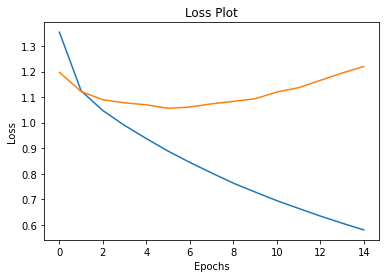

In [77]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Model Evaluation
1.Define evaluation function using greedy search

2.Define evaluation function using beam search 

3.Test it on a sample data using BLEU score

### Greedy Search

In [78]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    #hidden = decoder.reset_state(batch_size=1)
    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess_images_function(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id =  tf.argmax(predictions[0]).numpy()#extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id])#map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

In [79]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()


In [80]:
from nltk.translate.bleu_score import sentence_bleu

In [81]:
img_test = img_test_data.copy()

In [82]:
def predicted_caption_audio(random,autoplay=False,weights=None):

    cap_test=caption_test_data.copy()
    np.random.seed(random)
    rid = np.random.randint(0, len(cap_test))
    test_image = img_test[rid]
    #test_image = 'Flickr8K/Images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot,pred_test = evaluate(test_image)

    real_caption=filt_text(real_caption)      

    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score2 = sentence_bleu(reference, candidate, weights=(0.5, 0.5))
    score3 = sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33))
    print(f"BELU score2 : {score2*100} score3: {score3*100}")

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attmap(result, attention_plot, test_image)

    #Let's use Google Text to Speech Online API from playing the predicted caption as audio
    speech = gTTS("Predicted Caption is: "+ pred_caption,lang = 'en', slow = False) 
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'
    #playsound('voice.wav')
    display.display(display.Audio(audio_file, rate=None,autoplay=autoplay))
    
    return test_image

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score2 : 2.2402790036937483e-153 score3: 1.8120197636370322e-202
Real Caption: a black dog and a brown dog run along a dirt path
Prediction Caption: two dogs run through the grass


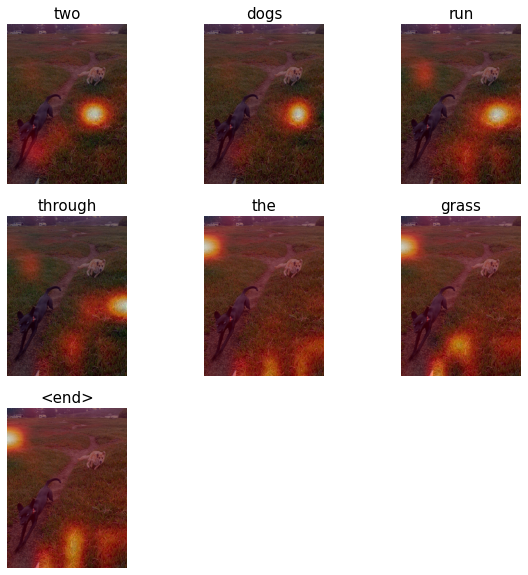

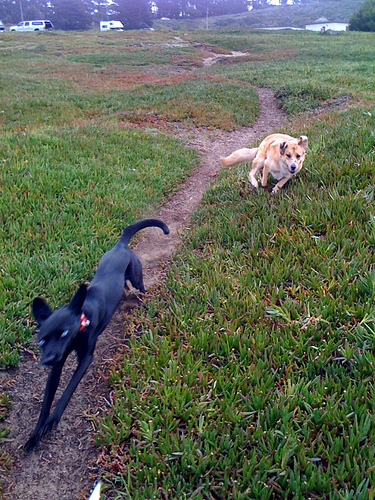

In [83]:
test_image=predicted_caption_audio(1,True)

Image.open(test_image)

BELU score2 : 32.76490485424231 score3: 26.81732631300094
Real Caption: a brown dog running across a flat rock
Prediction Caption: a brown dog is in the camera


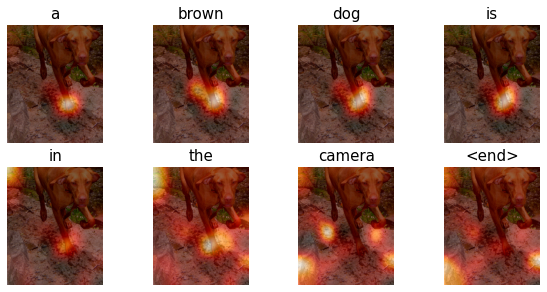

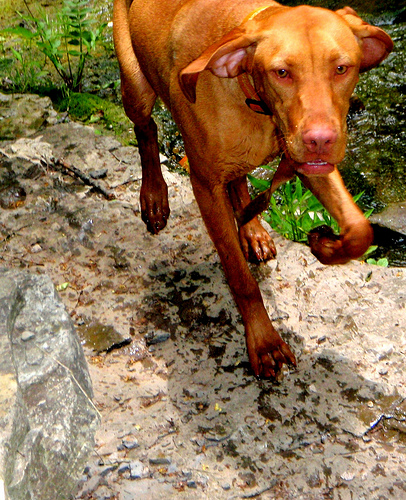

In [84]:
test_image=predicted_caption_audio(2,False)
Image.open(test_image)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score2 : 6.6709427497276e-153 score3: 5.231030151567237e-202
Real Caption: three children play in an outside wood structure
Prediction Caption: three boys in shorts is jumping off of a building


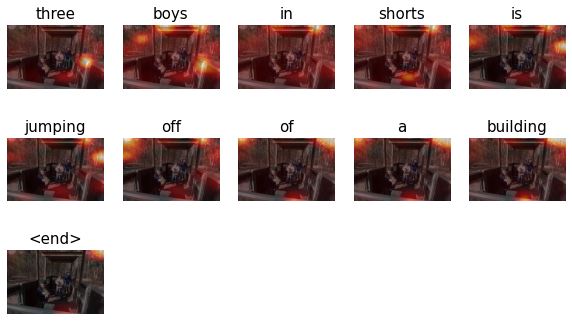

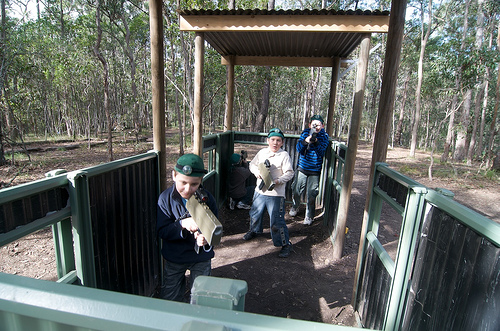

In [85]:
test_image=predicted_caption_audio(3,False)
Image.open(test_image)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score2 : 18.257418583505533 score3: 9.708980935455592e-101
Real Caption: a girl swings high in the air
Prediction Caption: a girl in a swimsuit is squeezing through a toy


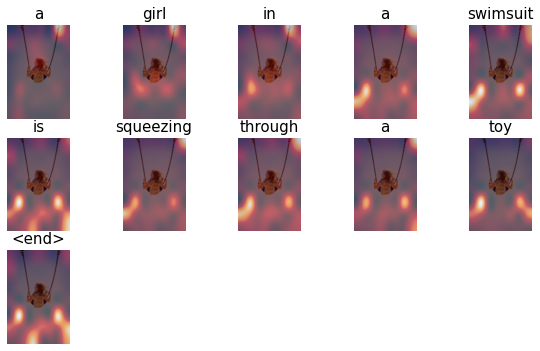

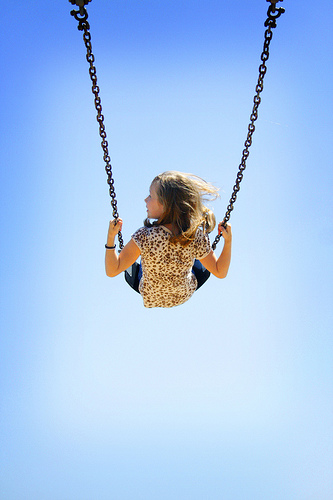

In [86]:
test_image=predicted_caption_audio(4,False)
Image.open(test_image)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score2 : 15.112766687421516 score3: 7.368243437115004e-101
Real Caption: a large tan bulldog walking along the rocky shore of a small stream
Prediction Caption: a large brown dog is walking on the beach


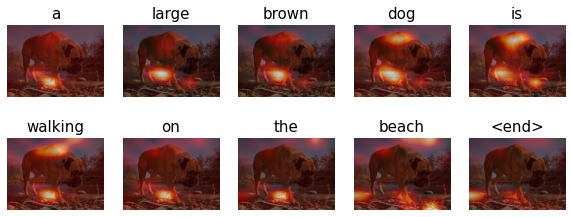

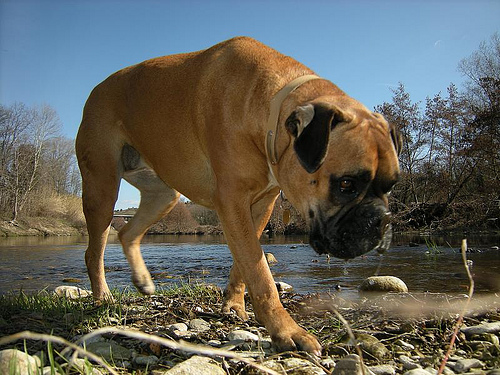

In [87]:
test_image=predicted_caption_audio(5,False)
Image.open(test_image)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score2 : 9.589266029707682 score3: 6.347489698353134e-101
Real Caption: a woman is holding two children while sitting on the grass
Prediction Caption: a woman wearing a white dress is holding a white dress is holding a white dress is holding a white dress is holding a white dress is holding a white


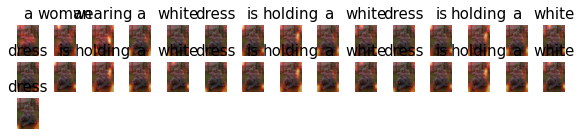

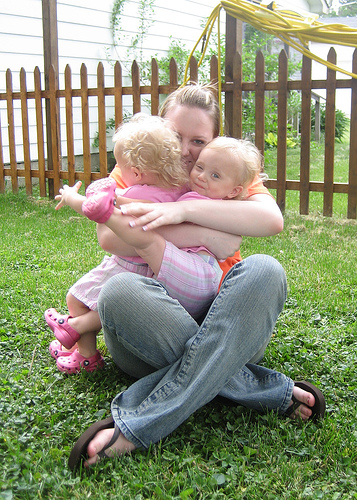

In [88]:
test_image=predicted_caption_audio(6,False)
Image.open(test_image)

Summary:
The project started with reading images and captions,displaying them.EDA is performed to understand about the given data set. Data cleaning is done which included cleaning caption file.

Data preprocessing is also performed which included :

tokenizing the captions and forming an embeded vector,
preprocessing images.
Post that a data set is splitted into train and test dataset.

InceptionV3 model is used.Inception v3 is a widely-used image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset. So let's also use same model to get feature vector.

Here in this project, we are not classifying the images. Rather,we only need to extract a featire vector for our images.Hence we are removing the softmax layer from the model. The shape of the output of this layer is 8x8x2048. Then we squeezed that to a shape of (64, 2048).

This feature vector is given as input to CNN Encoder which had a single fully connected layer. To tell in abstract way,we can say that output from the encoder, hidden state(initialized to 0), and start token is passed as input to the decoder.

The decoder (RNN -here GRU) attends over the image to predict the next word. We used the attention model to make our decoder focus on a particular part of the image at a time rather than focusing on the entire image. This also reduces noise and improves accuracy.The decoder returns the predicted caption and the decoder's hidden state as output. which is sent back to the model and the predictions are used to calculate the loss using cross-entropy "SparseCategoricalCrossentropy".We also used teacher forcing to decide the next input to the decoder.

The decoder stop predicting when the model predicts the end token.

The prediction of the words by the model is done by finding out the probabilities of that word in the vocabulary. We are using the greedy search method. It calculates the probability of the words according to their occurrence in the vocabulary. It takes the sample of the words, finds the probability of each word, and then outputs the word with the highest probability.

Finally, we are using the "BLEU score"(Bilingual Evaluation Understudy) as the evaluation metric for the predicted word. It determines the difference between the predicted caption and the real caption



### Beam Search

In [89]:
### TODO, not accurate
def beam_evaluate(image, beam_index = 3):
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
          
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                    
                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]
        
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    result2 = result[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption



In [90]:
def predicted_caption_beam_audio(random,autoplay=False,weights=(0.5, 0.5, 0, 0)):

    cap_test=caption_test_data.copy()
    np.random.seed(random)
    rid = np.random.randint(0, len(cap_test))
    test_image = img_test[rid]
    #test_image = 'Flickr8K/Images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot,pred_test = beam_evaluate(test_image)

    real_caption=filt_text(real_caption)      

    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score2 = sentence_bleu(reference, candidate, weights=(0.5, 0.5))#set your weights)
    score3 = sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33))#set your weights)
    print(f"BELU score2 : {score2*100} score3: {score3*100}")

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attmap(result, attention_plot, test_image)

    #Let's use Google Text to Speech Online API from playing the predicted caption as audio
    speech = gTTS("Predicted Caption is: "+ pred_caption,lang = 'en', slow = False) 
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'
    #playsound('voice.wav')
    display.display(display.Audio(audio_file, rate=None,autoplay=autoplay))
    
    return test_image

In [91]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [92]:
from nltk.translate.bleu_score import sentence_bleu

In [93]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [95]:
rid = np.random.randint(0, len(img_test))
test_image = img_test[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=None)
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [ ]:
captions=beam_evaluate(test_image)
print(captions)